# Step 3: Visualizing
Even though we did not get a strong correlations, lets visualize our enhanced accident data with weather info. First, lets import the necesary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (18.,10.)})
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

Now lets read our processed csv files containing accident data with weather conditions and the same info but grouped by day:

In [2]:
data = pd.read_csv('data/results/detailed.csv', dtype={"date":"str"}, parse_dates=["date"])
grouped = pd.read_csv('data/results/grouped.csv')
grouped.drop(["Unnamed: 0"], axis =1)

/var/folders/zt/x4f866fn6v5b11fyl7jzdnk80000gn/T/ipykernel_4109/1867611885.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/results/detailed.csv', dtype={"date":"str"}, parse_dates=["date"])


,date,district_name,cyrcadian,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,precipitation_sum,rain_sum,precipitation_hours
0,2010-01-01,Eixample,Matí,Desconegut,0.0,2.0,0.0,2.0,2.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
1,2010-01-01,Eixample,Tarda,Desconegut,0.0,1.0,0.0,1.0,5.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
2,2010-01-01,Sant Andreu,Tarda,Desconegut,0.0,1.0,0.0,1.0,1.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
3,2010-01-01,Sant Martí,Tarda,Desconegut,0.0,3.0,0.0,3.0,4.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
4,2010-01-01,Sants-Montjuïc,Tarda,Desconegut,0.0,0.0,0.0,0.0,2.0,13.8,8.9,11.1,1.4,8.0,5.1,2010-01-01T08:15,2010-01-01T17:34,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65428,2021-12-31,Eixample,Tarda,No és causa del vianant,0.0,3.0,0.0,3.0,5.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65429,2021-12-31,Horta-Guinardó,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,3.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65430,2021-12-31,Sant Martí,Tarda,No és causa del vianant,0.0,2.0,0.0,2.0,4.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0
65431,2021-12-31,Sarrià-Sant Gervasi,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,17.7,8.0,11.9,6.3,17.0,10.8,2021-12-31T08:15,2021-12-31T17:33,0.0,0.0,0.0


Lets start exploring the data set through graphs, we'll start by plotting a histogram of accidents over time:

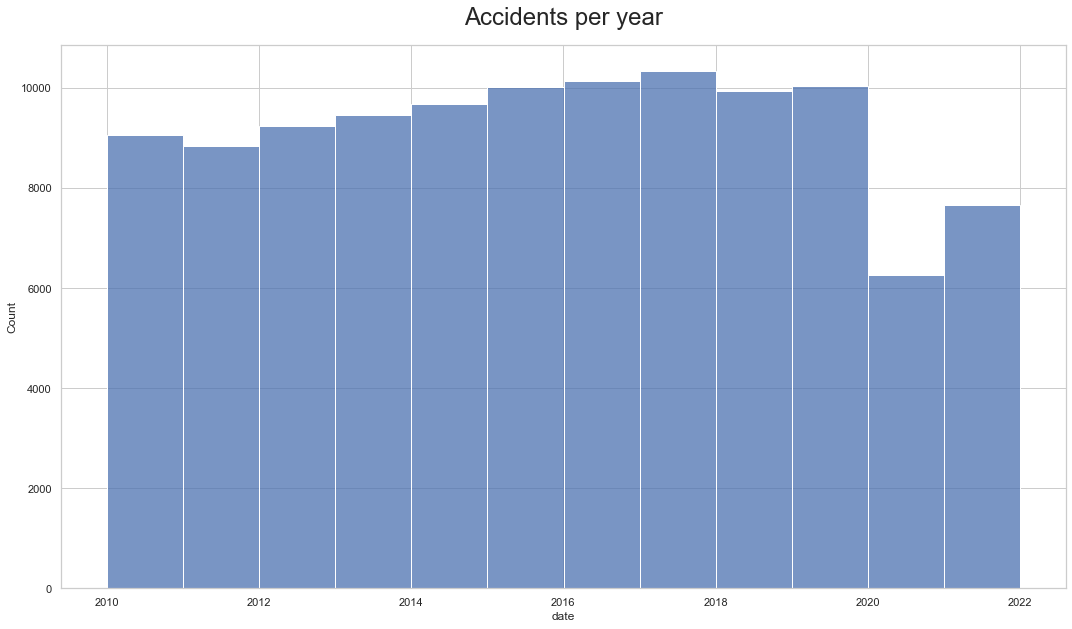

In [3]:
sns.histplot(x=data.date, bins=12);
plt.title("Accidents per year", fontsize=24, pad=20);

plt.savefig('images/fig1.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()

Accidents seem pretty evenly distributed over time. We can see a tip in the first part of 2020. Surely it must be related to the COVID-19 pandemic. Lets dive deeper into the data we have.

## Accidents by district

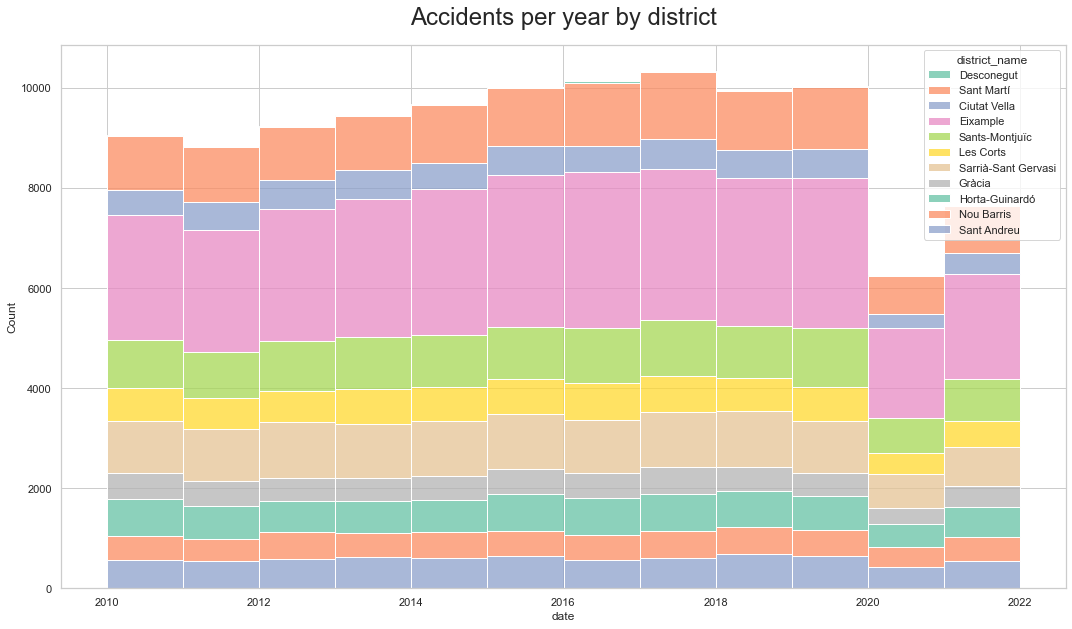

In [8]:
sns.histplot(data=data, x="date", hue="district_name", multiple="stack", bins=12, palette='Set2');
plt.title("Accidents per year by district", fontsize=24, pad=20);
plt.savefig('images/fig2.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()

Looks like l'Eixample is the area with most incidents. Lets have a look at the incident type now.

## Accidents by incident type

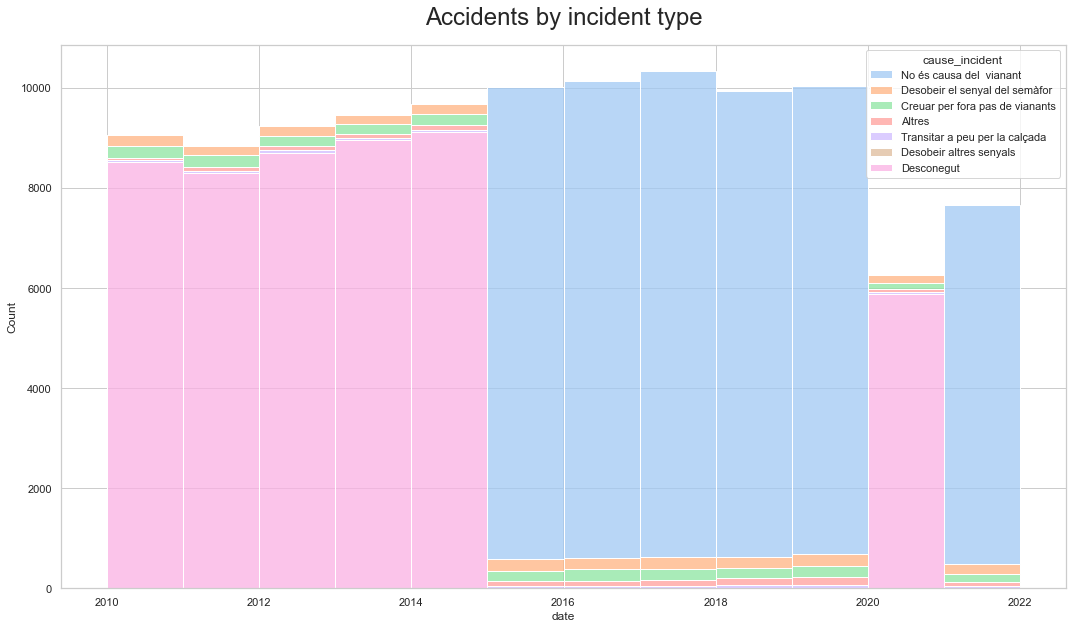

In [9]:
sns.histplot(data=data, x="date", hue="cause_incident", multiple="stack", bins=12, palette="pastel");
plt.title("Accidents by incident type", fontsize=24, pad=20);
plt.savefig('images/fig3.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()

This plot is suggesting there has been some sort of methodology change. Most fo the cases are being classified as "Desconegut" or "No és causa del vianant" for distinct periods of time (2010 - 2015, and 2020) and (2015 - 2019 and 2021) respectively.

Lets now explore how different variables behave across our data.

## Accidents (vs Rain & temperature)
The following scatter plot shows every accident registered according to the total rainfall during that day and the mean temperature.

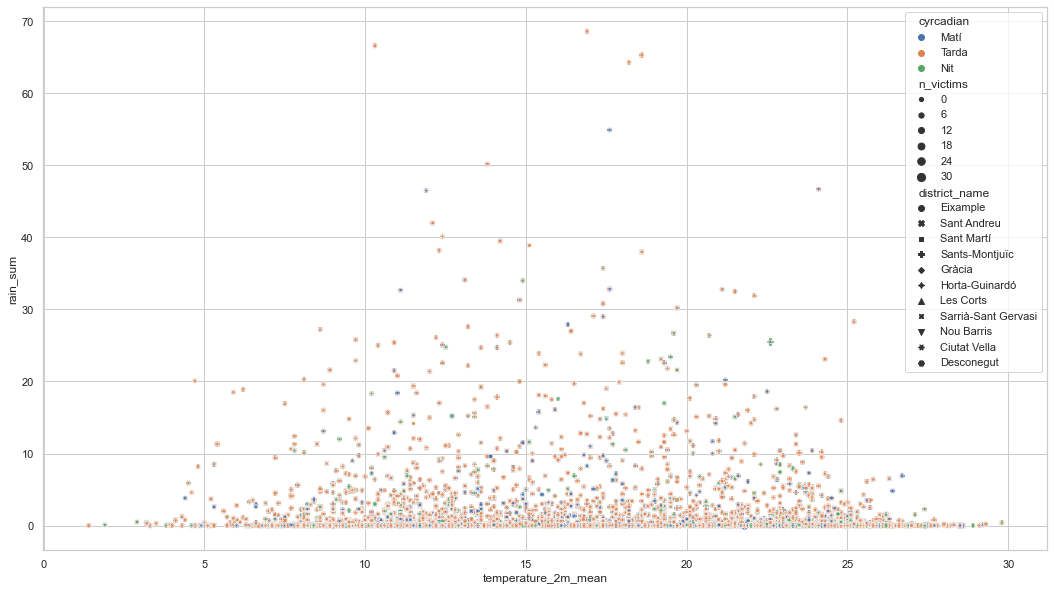

In [10]:
sns.scatterplot(y="rain_sum", x="temperature_2m_mean", size="n_victims", style="district_name", hue="cyrcadian", data = grouped);
plt.savefig('images/fig4.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()

Rain does not seem to particularly affect the ocurrance of accidents. If anything, most of the accidents occur when theres litle to no rain. The same can be said about temperature, accidents seem to occur with the same frequency on low temperatures and on higher ones. Lets take a deeper look into incident causes:

## Accidents by cause:

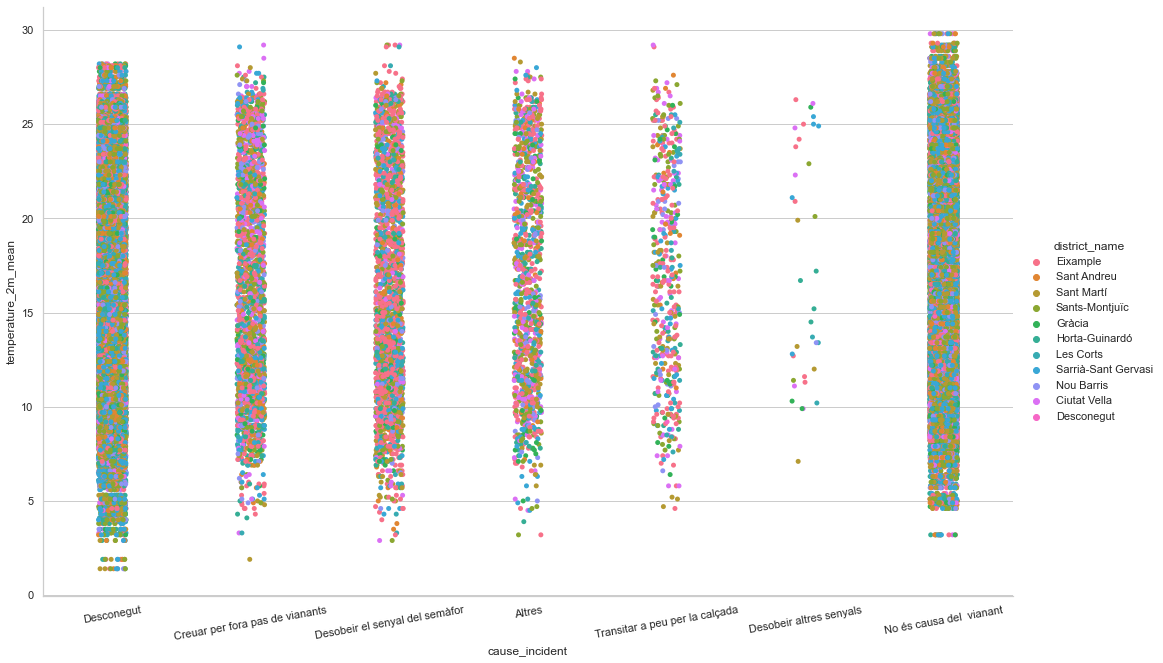

In [11]:
sns.catplot(data=grouped, x="cause_incident", y="temperature_2m_mean", hue="district_name", height=9, aspect=1.6);
plt.xticks(rotation=10);
plt.savefig('images/fig5.jpg', format='jpg', transparent=False, bbox_inches='tight')
plt.show()

# Conclusion

The only relatively signifcant covariance value we obtained was the relationship between the amount of cases where people disobeyed other traffic signals (Desobeir altres senyals) and temperature. However, looking at the categorical plot, the number of cases in this category is significantly lower than other categories and that must be affecting this correlation value (the little values we have seem to be relatively evenly distributed).

### Possible analysis flaws

1. Data collecting procedures and parameters need to be revised
    I could not find any specific information on how this data was collected other than it was collected by "la guardia urabana". We are looking at only reported cases and of those instances, the category of accidents is limited and seems to be centered on accidents involving pedestrians.

    Original data set: https://opendata-ajuntament.barcelona.cat/data/ca/dataset/accidents-gu-bcn

2. The occurrance of rain was the main suspect in this analysis
    The initial assumption was that the ocurrance of rain would increase the number of accidents. However, adding current weather conditions didnt show any significant correlaltion between this factor and the number of accidents. I also tried offsetting the weather conditions by 1, 2 and even 3 hours, under the asumption that rain only starts causing accidents after it has stopped and the streets are wet. However these analysis yield similar results: low correlation.

### Takeaways

#### Don't worry too much about the rain
![SegmentLocal](images/skidding-truck-viralhog.gif "segment")

